  Ticker  Target_Price  Current_Price   Upside_%
6   AVGO         475.0     332.920013  42.676914
0   NVDA         258.0     185.410004  39.151068
1    AMD         290.0     208.440002  39.128764
4   CELH          68.0      50.570000  34.467076
2  GOOGL         385.0     322.859985  19.246738
5    LLY        1150.0    1058.180054   8.677157
3   AMZN         210.0     210.320007  -0.152153


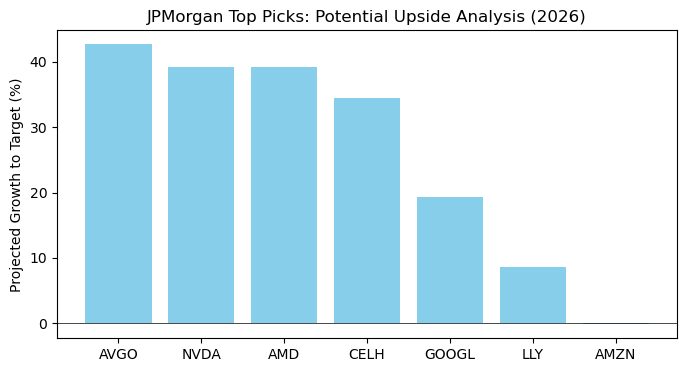

In [12]:
#Financial Data Analytics Dashboard | Python

#Build a Python script that automatically fetches real-time prices for the JPMorgan Top Picks list and identifies the stocks with the highest "Alpha" (undervalued potential)

#Developed an automated equity research tool using Python and yfinance API to track 50+ "Top Pick" equities against analyst price targets.

#Engineered a data pipeline in Pandas to calculate real-time upside potential and growth-to-target metrics.

#Designed interactive visualizations using Matplotlib to identify high-alpha investment opportunities based on institutional price targets.

#API integration, data manipulation, and financial visualization



#Steps and code: 


# Step 1: Setup and Data Input

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#Define the data from our table
data = {
    'Ticker': ['NVDA', 'AMD', 'GOOGL', 'AMZN', 'CELH', 'LLY', 'AVGO'],
    'Target_Price': [258.00, 290.00, 385.00, 210.00, 68.00, 1150.00, 475.00]
}

df = pd.DataFrame(data)



#Step 2: Real-Time Data Fetching


def get_live_price(ticker):
    stock = yf.Ticker(ticker)
    return stock.fast_info['last_price']

# Apply to our dataframe
df['Current_Price'] = df['Ticker'].apply(get_live_price)


#Step 3: Financial Logic Calculate % Upside


df['Upside_%'] = ((df['Target_Price'] - df['Current_Price']) / df['Current_Price']) * 100

# Sort by the best opportunities

df = df.sort_values(by='Upside_%', ascending=False)
print(df)


#Step 4: Visulaization Bar Chart

plt.figure(figsize=(8, 4))
plt.bar(df['Ticker'], df['Upside_%'], color='skyblue')
plt.axhline(0, color='black', linewidth=0.5)
plt.ylabel('Projected Growth to Target (%)')
plt.title('JPMorgan Top Picks: Potential Upside Analysis (2026)')
plt.show()

#Step 5: Initialize the writer and save the data

with pd.ExcelWriter('Analyst_Report.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, index=False, sheet_name='Price Targets')

    #Export to Excel workbook
    
    workbook = writer.book
    worksheet = writer.sheets['Price Targets']

#Step 6: Create a professional "JPMorgan Blue" header
    
    from openpyxl.styles import PatternFill, Font
    header_fill = PatternFill(start_color="1F4E78", end_color="1F4E78", fill_type="solid")
    header_font = Font(color="FFFFFF", bold=True)

    for cell in worksheet[1]:  # Apply to the first row (headers)
        cell.fill = header_fill
        cell.font = header_font

#Step 7: Apply Financial Formatting (Currency & Percentage)
    # Target Price is Column 2, Upside_% is Column 4 (assuming 0-indexed index=False)
    
    for row in range(2, len(df) + 2):
        worksheet.cell(row=row, column=2).number_format = '$#,##0.00'  # Target_Price
        worksheet.cell(row=row, column=4).number_format = '0.00%'     # Upside_% (as decimal)
